In [42]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
df = pd.read_csv("/content/network_traffic_data.csv")
df

,Duration,Protocol,SourceIP,DestinationIP,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,24.077749,TCP,192.168.1.239,192.168.1.234,8055,1,827,198244,Attack
1,97.252384,ICMP,192.168.1.176,192.168.1.82,63174,687,673,1202973,Normal
2,85.842654,TCP,192.168.1.120,192.168.1.113,30873,570,319,984671,Attack
3,79.196991,UDP,192.168.1.212,192.168.1.140,4410,683,375,36284,Normal
4,34.928018,TCP,192.168.1.17,192.168.1.223,4702,989,465,817463,Normal
...,...,...,...,...,...,...,...,...,...
1995,94.038562,UDP,192.168.1.16,192.168.1.82,41118,268,877,707010,Attack
1996,59.318259,TCP,192.168.1.57,192.168.1.34,22287,96,444,1473730,Attack
1997,87.811070,ICMP,192.168.1.190,192.168.1.143,16543,210,132,218234,Normal
1998,75.921165,UDP,192.168.1.107,192.168.1.183,34460,426,991,134952,Normal


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         2000 non-null   float64
 1   Protocol         2000 non-null   object 
 2   SourceIP         2000 non-null   object 
 3   DestinationIP    2000 non-null   object 
 4   SourcePort       2000 non-null   int64  
 5   DestinationPort  2000 non-null   int64  
 6   PacketCount      2000 non-null   int64  
 7   ByteCount        2000 non-null   int64  
 8   Label            2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [45]:
df.isnull().sum()

Duration           0
Protocol           0
SourceIP           0
DestinationIP      0
SourcePort         0
DestinationPort    0
PacketCount        0
ByteCount          0
Label              0
dtype: int64

In [46]:
categorical_columns = ['Protocol', 'SourceIP' , 'DestinationIP' , 'Label']
for col in categorical_columns:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col])

In [47]:
df

,Duration,Protocol,SourceIP,DestinationIP,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,24.077749,1,155,150,8055,1,827,198244,0
1,97.252384,0,85,236,63174,687,673,1202973,1
2,85.842654,1,24,16,30873,570,319,984671,0
3,79.196991,2,126,46,4410,683,375,36284,1
4,34.928018,1,78,138,4702,989,465,817463,1
...,...,...,...,...,...,...,...,...,...
1995,94.038562,2,67,236,41118,268,877,707010,0
1996,59.318259,1,208,183,22287,96,444,1473730,0
1997,87.811070,0,101,49,16543,210,132,218234,1
1998,75.921165,2,9,93,34460,426,991,134952,1


In [48]:
X = df.drop(columns=['Duration'])

In [49]:
X

,Protocol,SourceIP,DestinationIP,SourcePort,DestinationPort,PacketCount,ByteCount,Label
0,1,155,150,8055,1,827,198244,0
1,0,85,236,63174,687,673,1202973,1
2,1,24,16,30873,570,319,984671,0
3,2,126,46,4410,683,375,36284,1
4,1,78,138,4702,989,465,817463,1
...,...,...,...,...,...,...,...,...
1995,2,67,236,41118,268,877,707010,0
1996,1,208,183,22287,96,444,1473730,0
1997,0,101,49,16543,210,132,218234,1
1998,2,9,93,34460,426,991,134952,1


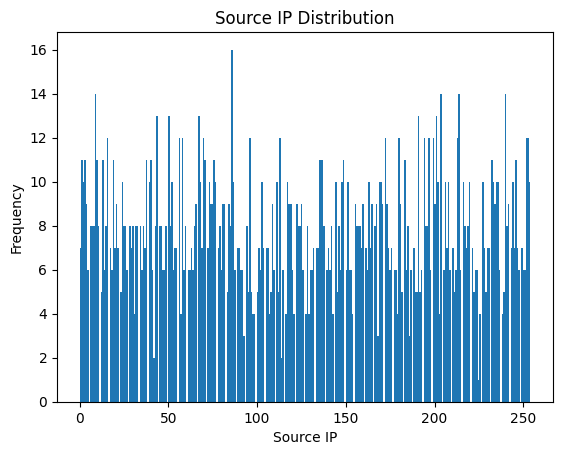

In [50]:
X['SourceIP'].plot(kind='hist', bins=300, )
plt.title('Source IP Distribution')
plt.xlabel('Source IP')
plt.ylabel('Frequency')
plt.show()

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test = train_test_split(X_scaled, test_size=0.5, random_state=45)

In [62]:
MODEL = IsolationForest(contamination=0.5, random_state=50)
MODEL.fit(X_train)

IsolationForest(contamination=0.5, random_state=50)

In [63]:
y_pred_test = MODEL.predict(X_test)


In [64]:
y_pred_test

array([ 1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1

In [65]:
y_pred_test = [1 if x==1 else 0 for x in y_pred_test]

In [66]:
y_pred_test

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,


In [67]:
y_test = [1]*len(y_pred_test)

In [68]:
print("classification_report:")
print(classification_report(y_test, y_pred_test))

classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65      1000

    accuracy                           0.48      1000
   macro avg       0.50      0.24      0.32      1000
weighted avg       1.00      0.48      0.65      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("confusion matrix:\n", conf_matrix)

confusion matrix:
 [[  0   0]
 [520 480]]
